## Use NN on the SPAM data
- Use CV or hold out to determine neurons(predictor) required
- Compare to the additive models(???)

Use cross-validation or the hold out method to determine the number of neurons to use in the layer. <br>
Compare your results to those for the additive model given in the chapter.<br>
When making the comparison, consider both the classification performance and interpretability of the final model.<br>
https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [42]:
column_list = []
total_columns = 59
for i in range(1 , total_columns):
    column_list.append("Column" + str(i))
spam_data = pd.read_csv('./spam.csv', delimiter=" ", names = column_list) 

In [43]:
spam_data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [44]:
spam_target = spam_data.Column58
spam_predictor = spam_data.drop("Column58", axis = 1)

In [45]:
predictor_train,predictor_test,target_train,target_test=train_test_split(spam_predictor,spam_target,test_size=0.2)

In [46]:

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000)
mlp.fit(predictor_train, target_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### Use cross-validation or the hold out method to determine the number of neurons to use in the layer. <br>


In [47]:

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(rfc, step=1, cv=10) # scoring='accuracy'
rfecv.fit(predictor_train, target_train.values.ravel())

RFECV(cv=10,
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [48]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 56


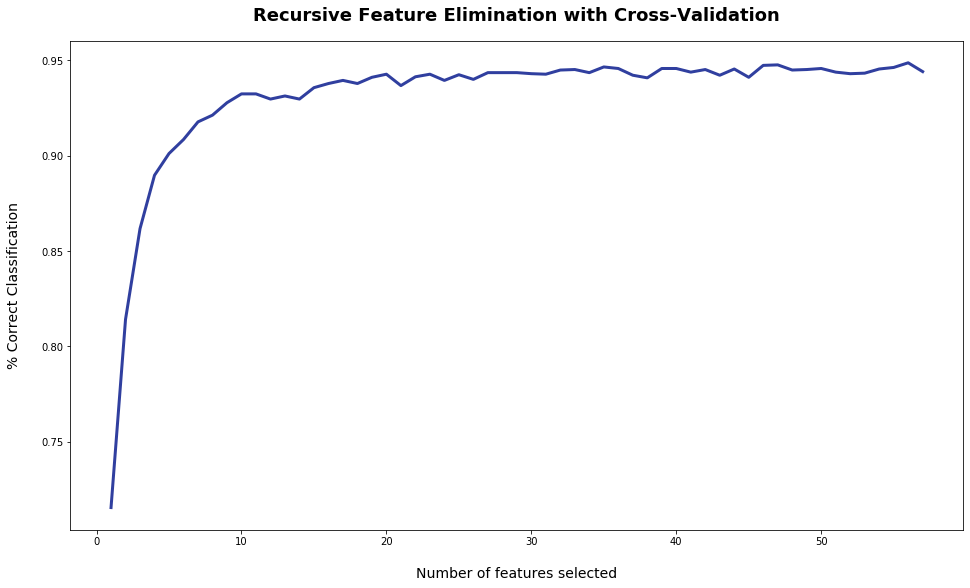

In [63]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.savefig("Recursive Feature Elimination with Cross-Validation")
plt.show()

In [50]:

mlp_test = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000) 
mlp_test.fit(predictor_train, target_train)
predictions = mlp_test.predict(predictor_test)
print(classification_report(target_test,predictions)) 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       535
           1       0.95      0.89      0.92       386

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



### Compare your results to those for the additive model given in the chapter.<br>


In [51]:
lm = LogisticRegression()
lm.fit(predictor_train, target_train)
predictions = lm.predict(predictor_test)   
print(accuracy_score(target_test,predictions))

0.9229098805646037


# Deprecated

---

In [52]:
# cv_levels = 10
# score = cross_val_score(mlp, predictor_train, target_train, cv=cv_levels)
# average_score = sum(score) / cv_levels

In [53]:
# average_score

In [54]:
# max_cv = cv_levels
# max_score = average_score
# print("max_cv" , max_cv)
# print("max_score" , max_score)

In [55]:
# for i in range(2 , 11):
#     score = cross_val_score(mlp, predictor_train, target_train, cv=i)
#     average_score = sum(score) / i
#     print(str(i) + " round , Score : " + str(average_score)) 
#     if average_score > max_score :
#         max_score = average_score
#         max_cv = i

In [56]:
# max_cv

In [57]:
# max_score

In [58]:
# for i in range(9 , 15):
#     mlp = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000)
#     mlp.fit(predictor_train, target_train.values.ravel())
#     score = cross_val_score(mlp, predictor_train, target_train, cv=max_cv)
#     average_score = sum(score) / max_cv
#     print( str(i) + " round. score : " + str(average_score))
#     if average_score > max_score :
#         max_score = average_score
#         max_cv = i

## i , i , i 
9 round. score : 0.929345504456407
10 round. score : 0.9320651010087877
11 round. score : 0.9209134466433516
12 round. score : 0.9293536251468428
13 round. score : 0.9250057950466959
14 round. score : 0.9211970246849723

## i , i 
9 round. score : 0.9239081743331455
10 round. score : 0.9320574956340932
11 round. score : 0.9277172829482115
12 round. score : 0.9301599733877328
13 round. score : 0.927452191667397
14 round. score : 0.928807197191152


In [59]:

# scores = cross_validate(clf, X, y, scoring=scoring)
# sorted(scores.keys())

In [60]:

# mlp_test = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000)

# scores = cross_validate(mlp_test, predictor_train, target_train, return_estimator=True)
# sorted(scores.keys())

In [61]:
# scores

In [62]:

# predictions = mlp.predict(predictor_test)
# print(confusion_matrix(target_test,predictions))
# print(classification_report(target_test,predictions))